In [81]:
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('../../..')
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.anova import AnovaRM  # perform F test


import cortico_cereb_connectivity.scripts.script_train_eval_models as ste

import warnings
warnings.filterwarnings('ignore')

##  Evaluate different models
Fusion9: ['Demand'','IBC','MDTB','Somatotopic','Nishimoto'],

MDTB:['ses-s1'], This is the connectivity model we used in the connectivity paper

MDTB:['ses-s1', 'ses-s2'] The connectivity weights will be averaged over ses-s1 and ses-s2

For each of the models, both Ridge and lasso regression will be considered


# What is the best performing model trained only on ses-s1 for MDTB

In [45]:
# get the best performing model for Md_ses-s1, L1 and L2 regression
dfs1=rm.comb_eval(models=['Md_ses-s1'],eval_t = 'eval', methods =['L2regression', 'L1regression'])
dfs1['model'].fillna('avg',inplace=True)
dfs1['nanY']=np.isnan(dfs1.noiseceiling_Y)
dfs1['nanXY']=np.isnan(dfs1.noiseceiling_XY)
dfs1['nanXR']=np.isnan(dfs1.noise_X_R)

In [54]:
# determine the best logalpha for each regularization method
## for L1 regression
ds_L1 = dfs1.loc[dfs1.method=='L1regression']
A_L1 = pd.pivot_table(ds_L1,index=['train_dataset'],columns=['logalpha'],values=['R_eval'])
B_L1 = np.nan_to_num(A_L1.values)
ind_L1 = B_L1.argmax(axis=1)
log_a_L1=np.array(A_L1.columns.get_level_values(1)[ind_L1])
bestla_L1 = pd.DataFrame(log_a_L1,index=A_L1.index,columns=['best_logalpha'])
ds_L1['isbest'] = ds_L1.logalpha.values  == bestla_L1.loc[ds_L1.train_dataset].values.flatten()

## for L2 regression
ds_L2 = dfs1.loc[dfs1.method=='L2regression']
A_L2 = pd.pivot_table(ds_L2,index=['train_dataset'],columns=['logalpha'],values=['R_eval'])
B_L2 = np.nan_to_num(A_L2.values)
ind_L2 = B_L2.argmax(axis=1)
log_a_L2=np.array(A_L2.columns.get_level_values(1)[ind_L2])
bestla_L2 = pd.DataFrame(log_a_L2,index=A_L2.index,columns=['best_logalpha'])
ds_L2['isbest'] = ds_L2.logalpha.values  == bestla_L2.loc[ds_L2.train_dataset].values.flatten()

# What is the best performing model trained only on all sessions for MDTB

In [55]:
# get the best performing model for Md_ses-s1, L1 and L2 regression
dfall=rm.comb_eval(models=['Md'],eval_t = 'eval', methods =['L2regression', 'L1regression'])
dfall['model'].fillna('avg',inplace=True)
dfall['nanY']=np.isnan(dfs1.noiseceiling_Y)
dfall['nanXY']=np.isnan(dfs1.noiseceiling_XY)
dfall['nanXR']=np.isnan(dfs1.noise_X_R)

In [57]:
# determine the best logalpha for each regularization method
# for L1 regression
d_L1 = dfall.loc[dfall.method=='L1regression']
A_L1 = pd.pivot_table(d_L1,index=['train_dataset'],columns=['logalpha'],values=['R_eval'])
B_L1 = np.nan_to_num(A_L1.values)
ind_L1 = B_L1.argmax(axis=1)
log_a_L1=np.array(A_L1.columns.get_level_values(1)[ind_L1])
bestla_L1 = pd.DataFrame(log_a_L1,index=A_L1.index,columns=['best_logalpha'])
d_L1['isbest'] = d_L1.logalpha.values  == bestla_L1.loc[d_L1.train_dataset].values.flatten()

# for L2 regression
d_L2 = dfall.loc[dfall.method=='L2regression']
A_L2 = pd.pivot_table(d_L2,index=['train_dataset'],columns=['logalpha'],values=['R_eval'])
B_L2 = np.nan_to_num(A_L2.values)
ind_L2 = B_L2.argmax(axis=1)
log_a_L2=np.array(A_L2.columns.get_level_values(1)[ind_L2])
bestla_L2 = pd.DataFrame(log_a_L2,index=A_L2.index,columns=['best_logalpha'])
d_L2['isbest'] = d_L2.logalpha.values  == bestla_L2.loc[d_L2.train_dataset].values.flatten()

# prep for comparing models


In [60]:
# first get the best L1 and L2 for Md_ses-s1 and Md and concatenate them
d1 = d_L1.loc[d_L1.isbest]
d2 = d_L2.loc[d_L2.isbest]
d3 = ds_L1.loc[ds_L1.isbest]
d4 = ds_L2.loc[ds_L2.isbest]

D_Md = pd.concat([d1,d2,d3,d4],axis=0)

# Now get the fused model


In [67]:
# Add the favorite Fusion model
dfuse = rm.comb_eval(models=['Fu09'],eval_t = 'eval', methods=['L1regression', 'L2regression'])
# dall
# ho = ['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic','HCP','Fusion']
# palette = [[1,0,0],[0,1,0],[0,0,1],[0.5,1,0],[1,0,0],[0,0.7,0.7],[0,0,0]]
# ax=plt.gca()
# a=ax.set_xticklabels(ho, rotation = 90)
# plt.savefig(fig_dir + '/connectivity_model_fusion.pdf')

In [103]:
dall.columns

Index(['eval_subj', 'num_regions', 'train_dataset', 'train_ses', 'train_type',
       'cerebellum', 'cortex', 'method', 'logalpha', 'R_train', 'rmse_train',
       'R_cv', 'rmse_cv', 'eval_dataset', 'eval_ses', 'parcellation',
       'crossed', 'add_rest', 'splitby', 'type', 'cv_fold', 'model', 'R_eval',
       'R2_eval', 'noise_Y_R', 'noise_Y_R2', 'noise_X_R', 'noise_X_R2',
       'noiseceiling_Y', 'noiseceiling_XY', 'R_eval_adj', 'nanY', 'nanXY',
       'nanXR', 'isbest', 'extension'],
      dtype='object')

<AxesSubplot: ylabel='R_eval'>

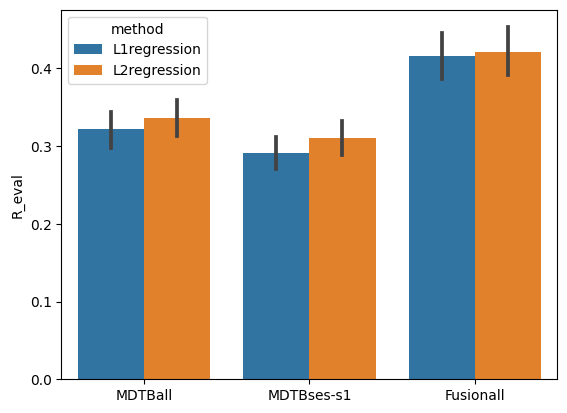

In [105]:
# concatenate the two dataframes
dall = pd.concat([D_Md,dfuse],ignore_index=True)
sns.barplot(data=dall,x=dall['train_dataset'] + dall['train_ses'],y='R_eval', hue = "method")


In [86]:
# is MDTB_all better than MDTB_ses-s1? separate L1 and L2 regression
d = dall.loc[dall.method == 'L1regression']
t=stats.ttest_rel(d[(d['train_dataset']=='MDTB') & (d['train_ses'] == "all")]['R_eval'],
                  d[(d['train_dataset']=='MDTB') & (d['train_ses'] == "ses-s1")]['R_eval'])

indx =d['train_dataset']=='MDTB'
df=indx.sum()-1
print(f't({df}) = {t.statistic:.3f}, p={t.pvalue:.4e}')

t(205) = 16.502, p=1.4711e-30


In [88]:
# is Fusion_all beteter than MDTB_all? separate L1 and L2 regression
d = dall.loc[dall.method == 'L2regression']
t=stats.ttest_rel(d[(d['train_dataset']=='Fusion') & (d['train_ses'] == "all")]['R_eval'],
                  d[(d['train_dataset']=='MDTB') & (d['train_ses'] == "all")]['R_eval'])

indx =d['train_dataset']=='MDTB'
df=indx.sum()-1
print(f't({df}) = {t.statistic:.3f}, p={t.pvalue:.4e}')

t(205) = 6.887, p=4.7820e-10


In [91]:
# is fusion_all L2 regression better than fusion_all L1 regression?
d = dall.loc[dall.train_dataset == 'Fusion']
t=stats.ttest_rel(d[(d['method'] == "L2regression")]['R_eval'],
                  d[(d['method'] == "L1regression")]['R_eval'])

indx =d['train_dataset']=='Fusion'
df=indx.sum()-1
print(f't({df}) = {t.statistic:.3f}, p={t.pvalue:.4e}')

t(205) = 1.764, p=8.0666e-02


In [96]:
# is MDTB_all L2 regression better than MDTB_all L1 regression?
d = dall.loc[dall.train_dataset == 'MDTB']
t=stats.ttest_rel(d[(d['train_ses']=='all') & (d['method'] == "L2regression")]['R_eval'],
                  d[(d['train_ses']=='all') & (d['method'] == "L1regression")]['R_eval'])

indx =d['train_dataset']=='MDTB'
df=indx.sum()-1
print(f't({df}) = {t.statistic:.3f}, p={t.pvalue:.4e}')

t(411) = 5.999, p=3.0412e-08


In [98]:
# What predicition accuracy relative to noise-ceiling? Fusion L2regression
dd = dall.loc[(dall.train_dataset == 'Fusion') & (dall.method == 'L2regression')]
print(f"R_eval {dd.R_eval.mean():.4f} + {dd.R_eval.std():.2f}")
adj = dd.R_eval.mean() / dd.noiseceiling_XY.mean() 
print(f"R_eval {adj:.4f} ") 
print(f'Average noiseceiling{dd.noiseceiling_XY.mean():.4f} ')
print(f'variance predicted:{adj**2:.4f}')

R_eval 0.4210 + 0.17
R_eval 0.7209 
Average noiseceiling0.5841 
variance predicted:0.5197


In [99]:
# What predicition accuracy relative to noise-ceiling? Fusion L1regression
dd = dall.loc[(dall.train_dataset == 'Fusion') & (dall.method == 'L1regression')]
print(f"R_eval {dd.R_eval.mean():.4f} + {dd.R_eval.std():.2f}")
adj = dd.R_eval.mean() / dd.noiseceiling_XY.mean() 
print(f"R_eval {adj:.4f} ") 
print(f'Average noiseceiling{dd.noiseceiling_XY.mean():.4f} ')
print(f'variance predicted:{adj**2:.4f}')

R_eval 0.4162 + 0.15
R_eval 0.7217 
Average noiseceiling0.5767 
variance predicted:0.5208


In [101]:
# What predicition accuracy relative to noise-ceiling? MDTB_all L2regression
dd = dall.loc[(dall.train_dataset == 'MDTB') & (dall.train_ses == "all") & (dall.method == 'L1regression')]
print(f"R_eval {dd.R_eval.mean():.4f} + {dd.R_eval.std():.2f}")
adj = dd.R_eval.mean() / dd.noiseceiling_XY.mean() 
print(f"R_eval {adj:.4f} ") 
print(f'Average noiseceiling{dd.noiseceiling_XY.mean():.4f} ')
print(f'variance predicted:{adj**2:.4f}')

R_eval 0.3215 + 0.12
R_eval 0.6910 
Average noiseceiling0.4652 
variance predicted:0.4775
